# Autocorrelation Functions and Fourier Transforms with Libra. Advanced module.


## Table of Content <a name="TOC"></a>

1. [General setups](#1)

2. [Data generation](#2) 
  
3. [ACF and FT calculation](#3)

  - 3.1. [Example 1](#3.1)
  
  - 3.2. [Example 2](#3.2)
  
  - 3.3. [Example 3](#3.3)
  
  - 3.4. [Example 4](#3.4)


4. [Convergence with respect to the size of data series](#4)

### A. Learning objectives

- to compute autocorrelation function (ACF) and Fourier Transform (FT) of data using recipe
- to know extra options available in the recipe 
- to explore the convergence of spectral calculations with respect to the number of data points


### B. Use cases

- compute ACF of data series
- compute spectra


### C. Functions

- `libra_py`
  - `influence_spectrum`
    - [`recipe1`](#recipe1-1) | [also here](#recipe1-2)
  - `units`
    - [`fs2au`](#fs2au-1)
    - [`inv_cm2Ha`](#inv_cm2Ha-1)


### D. Classes and class members

None


## 1. General setups
<a name="1"></a> [Back to TOC](#TOC)

In [1]:
import os, sys, math, copy
from liblibra_core import *
from libra_py import units
from libra_py import influence_spectrum

import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vect

## 2. Data generation
<a name="2"></a> [Back to TOC](#TOC)

Lets create the data with the known properties. In particular, we assume the data evolves with 3 frequencies: 500, 850, and 1400 cm^{-1}. Ideally, we should be able to see these frequencies in the FT of the ACF.

The 1000 data points is generated with the time distance between each one of 1 fs. 
<a name="fs2au-1"></a><a name="inv_cm2Ha-1"></a>

In [2]:
# Test case: 3 frequences
data = []
dt = 1.0 * units.fs2au
dw = 1.0 * units.inv_cm2Ha
w1 = 500.0 * units.inv_cm2Ha
w2 = 1400.0 * units.inv_cm2Ha
w3 = 850.0 * units.inv_cm2Ha
wspan = 2000.0 * units.inv_cm2Ha

for it in range(1000):
    t = it * dt
    d = MATRIX(3,1)
    d.set(0, 0, math.sin(w1*t) )
    d.set(1, 0, math.cos(w2*t) )
    d.set(2, 0, math.sin(w3*t) )
    data.append( d )

## 3. ACF and FT calculation
<a name="3"></a> [Back to TOC](#TOC)

Now, lets run the pre-defined function `recipe1` on this data:
<a name="recipe1-1"></a>

In [3]:
help(influence_spectrum.recipe1)

Help on function recipe1 in module libra_py.influence_spectrum:

recipe1(data, params)
    A recipe to compute ACF and its FT for data series
           
    Args:
        data ( list of MATRIX(ndof, 1) objects ): sequence of real-valued ndof-dimensional vectors
        params ( Python dictionary ): controlling the parameters
     
            * **params["dt"]** ( double ): time distance between the adjacent data points [units: fs, default: 1.0]
            * **params["wspan"]** ( double ): window of frequencies for the Fourier transform [ units: cm^-1, default: 3000.0 ]
            * **params["dw"]** ( double ): grid points spacing in the frequency domain [ units: cm^-1, default: 1.0 ]
            * **params["do_output"]** ( Boolean ): whether we print out the data the results into files [ default: False ]
            * **params["acf_filename"]** ( string ): the name of the file where to print the ACF [ default: "acf.txt"]
            * **params["spectrum_filename"]** ( string ): the 

Note that in this analysis we should use the dt consistent with that used in data generation (1 fs)

### 3.1. Example 1 
<a name="3.1"></a> [Back to TOC](#TOC)

We look only for frequencies in the range of 0 - 2000 cm^{-1} and the frequencies grid will be of 1 cm^{-1} - these some of the default parameters:
<a name="recipe1-2"></a>

In [4]:
T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, {})

And plot the results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


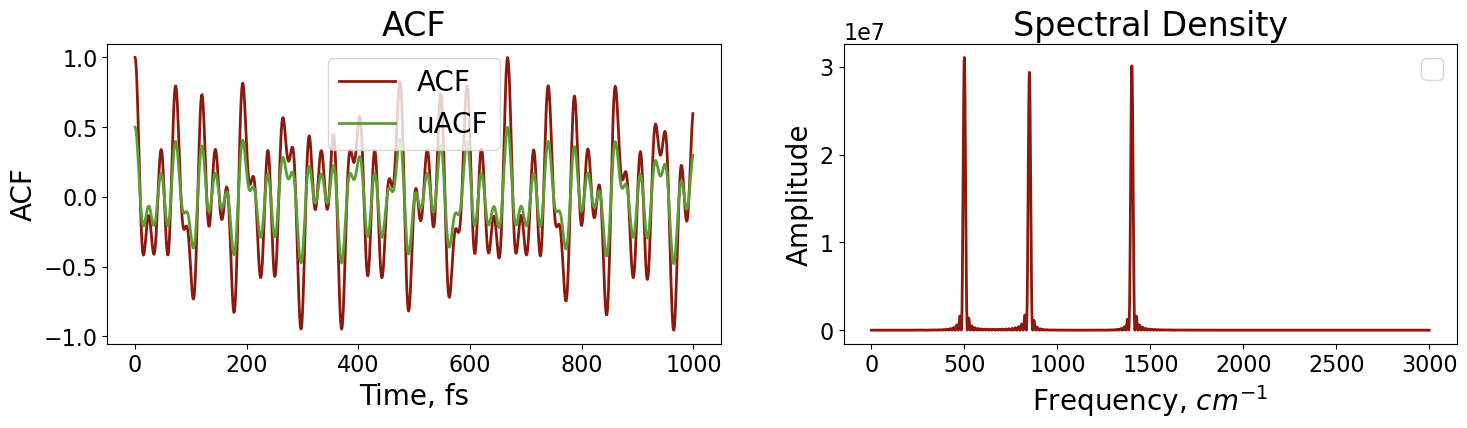

In [5]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('ACF')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(T, ACF, label='ACF', linewidth=2, color = colors["11"]) 
plt.plot(T, uACF, label='uACF', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Spectral Density')
plt.xlabel('Frequency, $cm^{-1}$')
plt.ylabel('Amplitude')
plt.plot(W, J2, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()

Alternatively, we can run the function with full set of parameters:

- `do_output=False`              # whether we want to generate the files for plotting, no, we don't
- `acf_filename="acf.txt"`       # this is where ACF data would be printed out
- `spectrum_filename="spectrum.txt"` # this is where FT data would be printed out
- `do_center=True`               # whether we are looking at the fluctuation of the data - yes, but you can also try no
- `opt=0`                        # this is the selector of the ACF convention, 0 is the chemical convention for ACF, 1 - is the convention for statisticians. You can also give it a try.

Note that unlike in the basic example, there are also options to save plots in the digital form as files (as plottable data), as well as to consider **data centering** - in this case, the ACF will be computed using data with the average center values (per each degree of freedom) subtracted. In fact, it is the default behavior.

Also, the parameters such as `dt` and frequencies are directly given in terms of commonly used units of femtosecond and $cm^{-1}$, respectively.

### 3.2. Example 2
<a name="3.2"></a> [Back to TOC](#TOC)

Here is an example showing ACF and FT computed the statistician convention.

In [6]:
params = {"acf_type":1}

T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, params)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


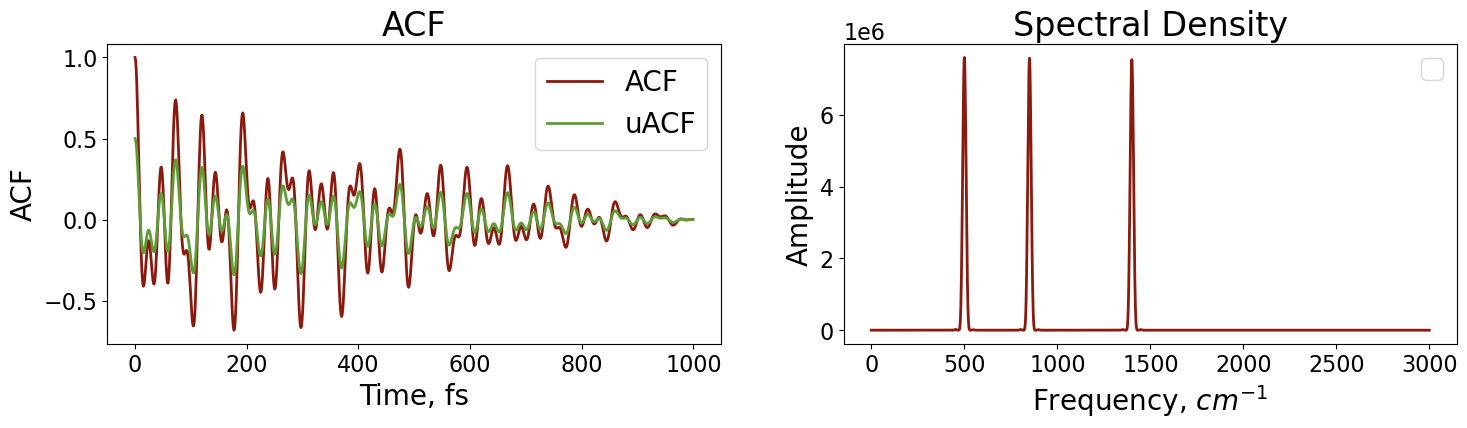

In [7]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('ACF')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(T, ACF, label='ACF', linewidth=2, color = colors["11"]) 
plt.plot(T, uACF, label='uACF', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Spectral Density')
plt.xlabel('Frequency, $cm^{-1}$')
plt.ylabel('Amplitude')
plt.plot(W, J2, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()

### 3.3. Example 3
<a name="3.3"></a> [Back to TOC](#TOC)

Here we also consider computing ACF/FT without data centering

In [8]:
params = {"acf_type":1, "do_center":False}

T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, params)

### 3.4. Example 4
<a name="3.4"></a> [Back to TOC](#TOC)

Below, we use the same procedure as in Example 1, but a different format to store our data (as a list of VECTOR objects)

In [9]:
# Test case: 3 frequences
data = []
dt = 1.0 * units.fs2au
dw = 1.0 * units.inv_cm2Ha
w1 = 500.0 * units.inv_cm2Ha
w2 = 1400.0 * units.inv_cm2Ha
w3 = 850.0 * units.inv_cm2Ha
wspan = 2000.0 * units.inv_cm2Ha

for it in range(1000):
    t = it * dt
    d = VECTOR(math.sin(w1*t), 1.0*math.cos(w2*t), 1.0*math.sin(w3*t))    
    data.append( d )
    
T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, {"data_type":1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


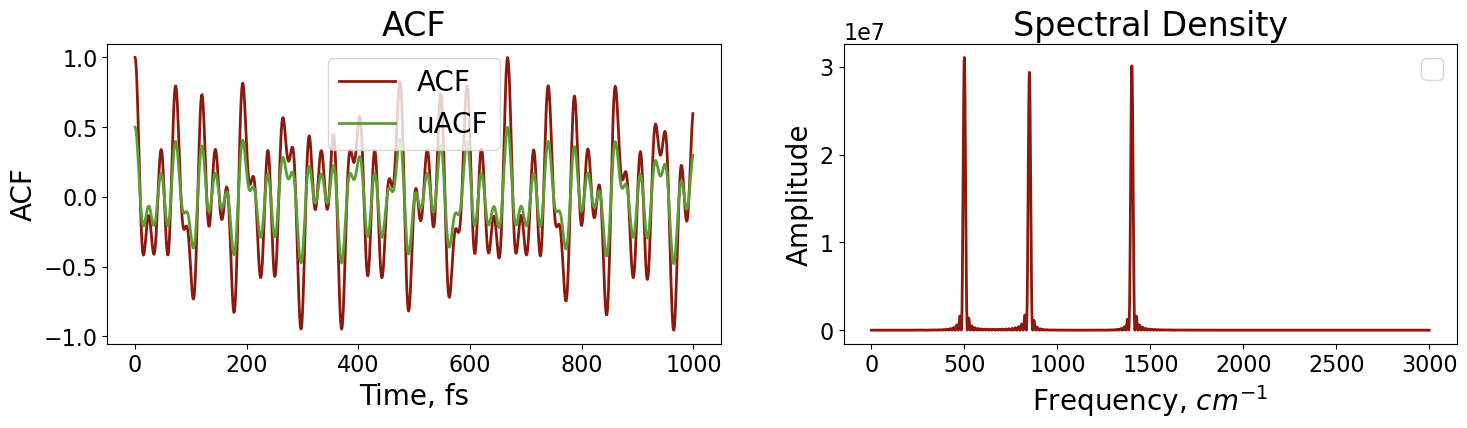

In [10]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('ACF')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(T, ACF, label='ACF', linewidth=2, color = colors["11"]) 
plt.plot(T, uACF, label='uACF', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Spectral Density')
plt.xlabel('Frequency, $cm^{-1}$')
plt.ylabel('Amplitude')
plt.plot(W, J2, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()

## 4. Convergence with respect to the size of data series
<a name="4"></a> [Back to TOC](#TOC)


First, let's define some auxiliary function that will generate data of a given length. The data is well characterized: we know all the frequencies. The function will take an agrument that determines how many data points to generate - this is the key parameter that will be explored next, when studying the convergence.

In [11]:
def gen_data(nsteps):
    
    # Test case: 3 frequences
    data = []
    dt = 1.0 * units.fs2au
    dw = 1.0 * units.inv_cm2Ha
    w1 = 500.0 * units.inv_cm2Ha
    w2 = 1400.0 * units.inv_cm2Ha
    w3 = 850.0 * units.inv_cm2Ha
    w4 = 2050.0 * units.inv_cm2Ha
    w5 = 2500.0 * units.inv_cm2Ha
    wspan = 3000.0 * units.inv_cm2Ha

    for it in range(nsteps):
        t = it * dt
        d = MATRIX(5,1)
        d.set(0, 0, math.sin(w1*t) )
        d.set(1, 0, math.cos(w2*t) )
        d.set(2, 0, math.sin(w3*t) )
        d.set(3, 0, math.sin(w4*t) )
        d.set(4, 0, math.cos(w5*t) )
        data.append( d )
        
    return data

Now, let's generate several data sets of different length and analyze them

In [12]:
T, ACF, uACF, W, J, J2 = [],[],[],[],[],[] 

for nsteps in [10, 50, 100, 250, 500, 1000]:
    data = gen_data(nsteps)
    t, acf, uacf, w, j, j2 = influence_spectrum.recipe1(data, {})
    
    T.append(t)
    ACF.append(acf)
    uACF.append(uacf)
    W.append(w)
    J.append(j)
    J2.append(j2)

Define an auxiliary plotting function

In [13]:
def plot(i):
    plt.subplot(6, 2, 2*i+1)
    plt.title('ACF')
    plt.xlabel('Time, fs')
    plt.ylabel('ACF')
    plt.plot(T[i], ACF[i], label='ACF', linewidth=2, color = colors["11"]) 
    plt.plot(T[i], uACF[i], label='uACF', linewidth=2, color = colors["21"]) 
    plt.legend()

    plt.subplot(6, 2, 2*i+2)
    plt.title('Spectral Density')
    plt.xlabel('Frequency, $cm^{-1}$')
    plt.ylabel('Amplitude')
    plt.plot(W[i], J2[i], label='', linewidth=2, color = colors["11"]) 
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


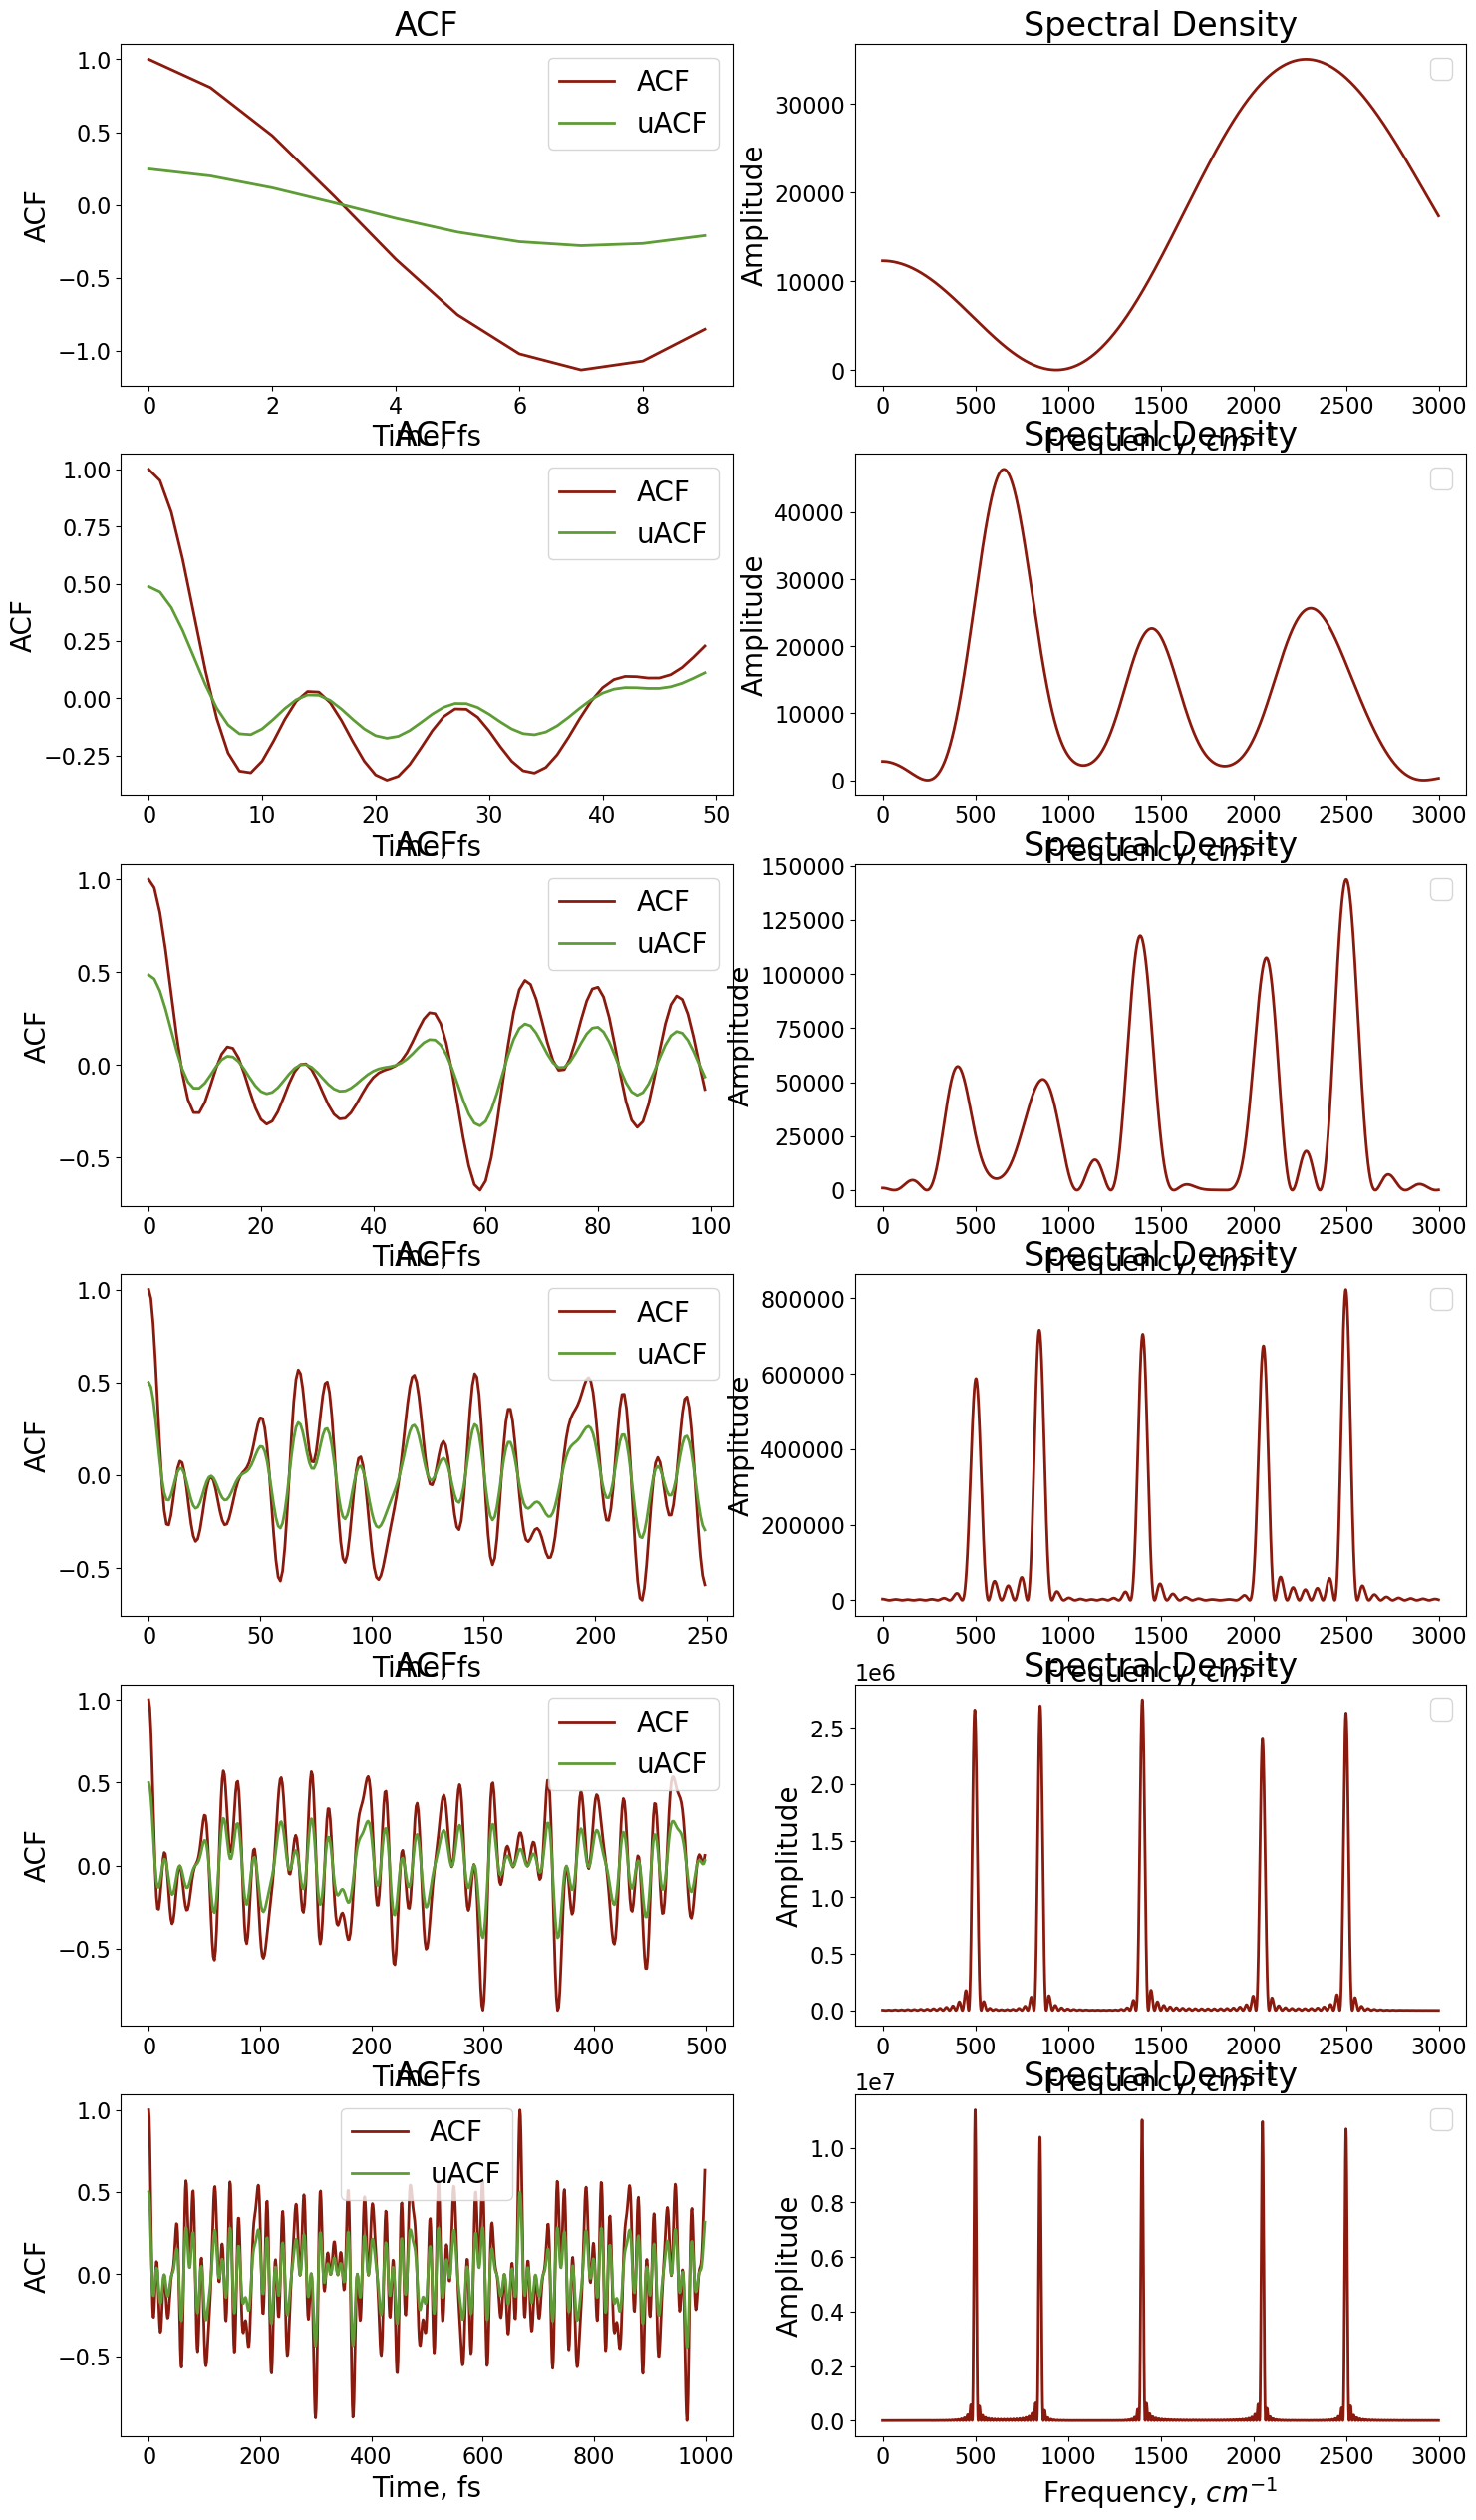

In [14]:
plt.figure(1, figsize=(18, 32)) # dpi=300, frameon=False)

for i in [0, 1, 2, 3, 4, 5]:
    plot(i)    
plt.show()
plt.close()